In [156]:
import pandas as pd
import numpy as np

p_table = pd.read_csv('C:/myPyCode/01_일별코로나확진자수.csv', encoding = 'euc-kr')
p_table = p_table.sort_values('확진일', ascending = False)
p_table.head()

,Column1,확진일,확진자수
557,557,2021-09-04,508
556,556,2021-09-03,566
555,555,2021-09-02,542
554,554,2021-09-01,559
553,553,2021-08-31,665


In [54]:
p_table = p_table[0:96]
p_table = p_table.drop(['Column1'],axis = 1)

In [55]:
p_table = p_table.sort_values('확진일', ascending = True)
p_table = p_table.reset_index()
p_table.tail(3)

,index,확진일,확진자수
93,555,2021-09-02,542
94,556,2021-09-03,566
95,557,2021-09-04,508


In [56]:
p_table = p_table.drop(['index'],axis = 1)
p_table.columns = ['날짜', '확진자수']
p_table.tail(4)

,날짜,확진자수
92,2021-09-01,559
93,2021-09-02,542
94,2021-09-03,566
95,2021-09-04,508


In [57]:
# 서울특별시 코로나19 백신 예방접종 현황 데이터를 csv 파일 다운로드(http://data.seoul.go.kr/dataList/OA-20914/S/1/datasetView.do)

v_table = pd.read_csv('C:/myPyCode/서울특별시 코로나19 백신 예방접종 현황.csv', encoding='euc-kr')
v_table.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021.09.06,9575355,145248,5704290,59.6,116052,3417102,35.7
1,2021.09.05,9575355,1388,5558869,58.1,1580,3300807,34.5
2,2021.09.04,9575355,22326,5557393,58.0,42787,3299212,34.5
3,2021.09.03,9575355,45045,5534916,57.8,113133,3256323,34.1
4,2021.09.02,9575355,39320,5489715,57.3,88297,3142962,32.8


In [58]:
v_table = v_table[2:98]
v_table = v_table.sort_values('접종일', ascending = True)
v_table = v_table.drop(['접종대상자','당일 1차접종자 수','1차접종률(%)','당일 2차접종자 수','2차접종률(%)'],axis = 1)
v_table = v_table.reset_index()
v_table = v_table.drop(['index'],axis = 1)
v_table.columns = ['날짜', '1차 접종 누계', '2차 접종 누계']
v_table.tail(4)

,날짜,1차 접종 누계,2차 접종 누계
92,2021.09.01,5450266,3054297
93,2021.09.02,5489715,3142962
94,2021.09.03,5534916,3256323
95,2021.09.04,5557393,3299212


In [64]:
v_table['날짜'] = v_table['날짜'].str.replace('.','-')
v_table.tail()

<ipython-input-64-e049dac90a58>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  v_table['날짜'] = v_table['날짜'].str.replace('.','-')


,날짜,1차 접종 누계,2차 접종 누계
91,2021-08-31,5415837,2959659
92,2021-09-01,5450266,3054297
93,2021-09-02,5489715,3142962
94,2021-09-03,5534916,3256323
95,2021-09-04,5557393,3299212


In [65]:
# 그래프를 그리기 위한 표 합성. 일일 확진자 표와 일일 코로나19 백신 접종자 표를 병합.
import pandas as pd
new_table = pd.merge(p_table, v_table)
new_table.tail()

,날짜,확진자수,1차 접종 누계,2차 접종 누계
91,2021-08-31,665,5415837,2959659
92,2021-09-01,559,5450266,3054297
93,2021-09-02,542,5489715,3142962
94,2021-09-03,566,5534916,3256323
95,2021-09-04,508,5557393,3299212


In [66]:
max(new_table['1차 접종 누계'])

5557393

In [67]:
min(new_table['1차 접종 누계'])

1092306

In [68]:
max(new_table['2차 접종 누계'])

3299212

In [69]:
min(new_table['2차 접종 누계'])

340624

In [81]:
min(new_table['확진자수'])

122

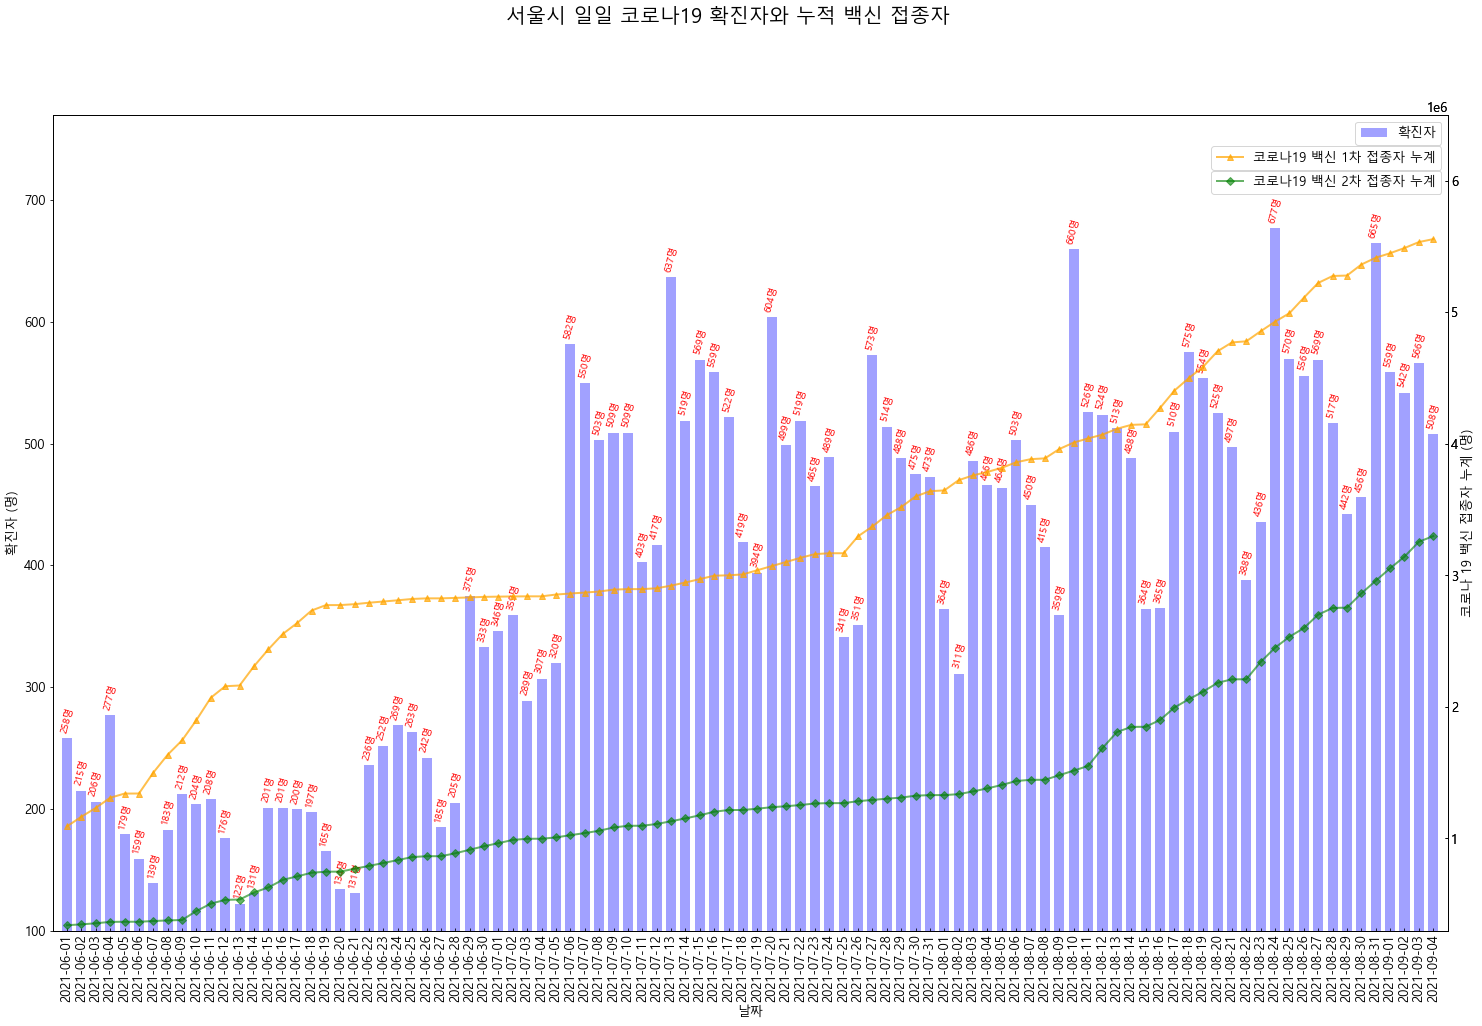

In [154]:
import matplotlib.pyplot as plt

# 한글을 쓰면 폰트가 깨지기 때문에 사용할 폰트를 직접 컴퓨터에 있는 폰트로 지정.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


x=[]  # 그래프 x축 명 지정을 위해 표의 값을 리스트로 저장.
for i in new_table.index:
    x.append(new_table['날짜'].values[i])
    
y0=[]  # 데이터 값 표기를 위해 데이터 값 리스트로 저장.
for i in new_table.index:
    y0.append(new_table['확진자수'].values[i])
    
y1=[]  # 데이터 값 표기를 위해 데이터 값 리스트로 저장.
for i in new_table.index:
    y1.append(new_table['1차 접종 누계'].values[i])

y2=[]  # 데이터 값 표기를 위해 데이터 값 리스트로 저장.
for i in new_table.index:
    y2.append(new_table['2차 접종 누계'].values[i])

# 그래프 전역 설정
plt.rcParams['figure.figsize'] = (25, 15)  # 그래프 크기 지정
plt.rcParams['font.size'] = 13             # 그래프 전역 폰트 크기 지정

fig, ax1 = plt.subplots()  # 여러개의 그래프를 그려야 하기 때문에 ".subplots()" 메서드 사용.
# subplots의 타이틀 메서드인 ".suptitle()" 사용.
fig.suptitle('서울시 일일 코로나19 확진자와 누적 백신 접종자', fontsize=20) 
ax1.bar(x, y0, color='blue', alpha=0.37, width=0.7, label='확진자') # 막대 그래프를 그리기 위해 "bar()" 함수 사용.
ax1.set_xlim(-1, 96)  # 그래프 x축 제한 메서드 "set_xlim()" 사용 하여 그래프 축 한계 설정.
ax1.set_ylim(100, 770)  # 그래프 y축 제한 메서드 "set_ylim()" 사용 하여 그래프 축 한계 설정.
ax1.set_xlabel('날짜')
ax1.set_ylabel('확진자 (명)')
ax1.tick_params(axis='x', direction='in', rotation = 90)

# 데이터 값 표시를 위하여 "text()" 함수 사용. "text()" 함수는 text(x좌표, y좌표, 데이터값, 기타 옵션) 형태로 사용.
for i, v in enumerate(new_table.index):
    ax1.text(i,y0[i]+5, "%0.0f" %y0[i]+'명', fontsize=10, color='red', horizontalalignment='center',rotation=75)

ax2 = ax1.twinx()
ax2.plot(x, y1, '-^', color='orange', markersize=6, linewidth=2, label='코로나19 백신 1차 접종자 누계', alpha=0.7)
ax2.set_xlim(-1, 96)
ax2.set_ylim(300000, 6500000)
#ax2.set_ylabel(r'코로나 19 백신 접종자 누계 (명)')
ax2.tick_params(axis='y', direction='in')
#for i, v in enumerate(new_table.index):
#    ax2.text(i, y1[i]+150000, "%0.1f" %y1[i]+'명', fontsize=9, color='orange', rotation=85)  # x 좌표, y 좌표, text

ax3 = ax1.twinx()
ax3.plot(x, y2, '-D', color='green', markersize=6, linewidth=2, label='코로나19 백신 2차 접종자 누계', alpha=0.6)
ax3.set_xlim(-1, 96)
ax3.set_ylim(300000, 6500000)
ax3.set_ylabel(r'코로나 19 백신 접종자 누계 (명)')
ax3.tick_params(axis='y', direction='in')
#for i, v in enumerate(new_table.index):
#    ax3.text(i, y2[i]+150000, "%0.1f" %y2[i]+'명', fontsize=9, color='green', rotation=85)  # x 좌표, y 좌표, text

# 세개의 그래프를 그려서 범례도 3개 라서 각각의 위치를 겹치지 않게 지정.
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,0.97))
ax3.legend(bbox_to_anchor=(1,0.94))
plt.savefig('서울시 일일 코로나19 확진자와 누적 백신 접종자.png', dpi=300)

In [123]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [124]:
countries.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [128]:
cities.tail(3)

,name,geometry
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


In [136]:
cities[171:188]

,name,geometry
171,Johannesburg,POINT (28.02806 -26.16810)
172,Amsterdam,POINT (4.91469 52.35191)
173,Seoul,POINT (126.99779 37.56829)
174,Manila,POINT (120.98027 14.60610)
175,Berlin,POINT (13.39960 52.52376)
176,Kinshasa,POINT (15.31303 -4.32778)
177,New Delhi,POINT (77.19998 28.60002)
178,Athens,POINT (23.73138 37.98527)
179,Baghdad,POINT (44.39192 33.34059)
180,Addis Ababa,POINT (38.69806 9.03526)
